In [6]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [7]:
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [10]:
fashion_mnist = datasets.fashion_mnist
(train_images , train_labels), (test_images , test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 24s 1us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 5s 1us/step


In [11]:
type(train_images)

numpy.ndarray

In [12]:
type(train_labels)

numpy.ndarray

In [13]:
print(len(train_images))

60000


In [15]:
print(train_images[0].shape)

(28, 28)


In [17]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

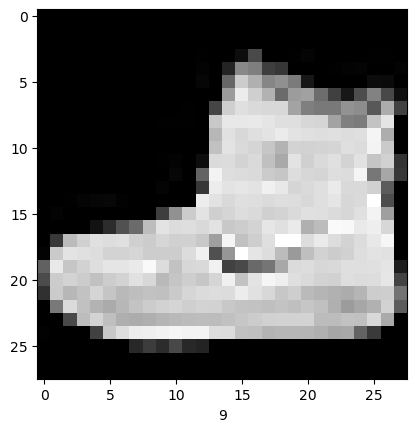

In [21]:
 plt.imshow(train_images[0], cmap='grey')
plt.xlabel(train_labels[0])
plt.show()

In [24]:
print(train_labels[0])

9


In [25]:
train_images , test_images = train_images/255.0 , test_images/255.0

In [26]:
print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [27]:
train_images = train_images.reshape((train_images.shape[0] , 28,28,1))
test_images = test_images.reshape((test_images.shape[0] ,28 ,28, 1))

In [28]:
train_images.shape

(60000, 28, 28, 1)

In [29]:
test_images.shape

(10000, 28, 28, 1)

In [33]:
model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3) , activation='relu' , input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64 , (3,3) , activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64 , (3,3) , activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [34]:
model.compile(optimizer = 'adam',
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [35]:
history  = model.fit(train_images , train_labels , epochs=5, validation_data=(test_images , test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8170 - loss: 0.4986 - val_accuracy: 0.8663 - val_loss: 0.3689
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8831 - loss: 0.3209 - val_accuracy: 0.8852 - val_loss: 0.3223
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9018 - loss: 0.2717 - val_accuracy: 0.8925 - val_loss: 0.3006
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9131 - loss: 0.2401 - val_accuracy: 0.8952 - val_loss: 0.2869
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9217 - loss: 0.2141 - val_accuracy: 0.8984 - val_loss: 0.2854


In [36]:
test_loss , test_acc = model.evaluate(test_images , test_labels , verbose =2)
print('Test Accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8984 - loss: 0.2854
Test Accuracy: 0.8984000086784363


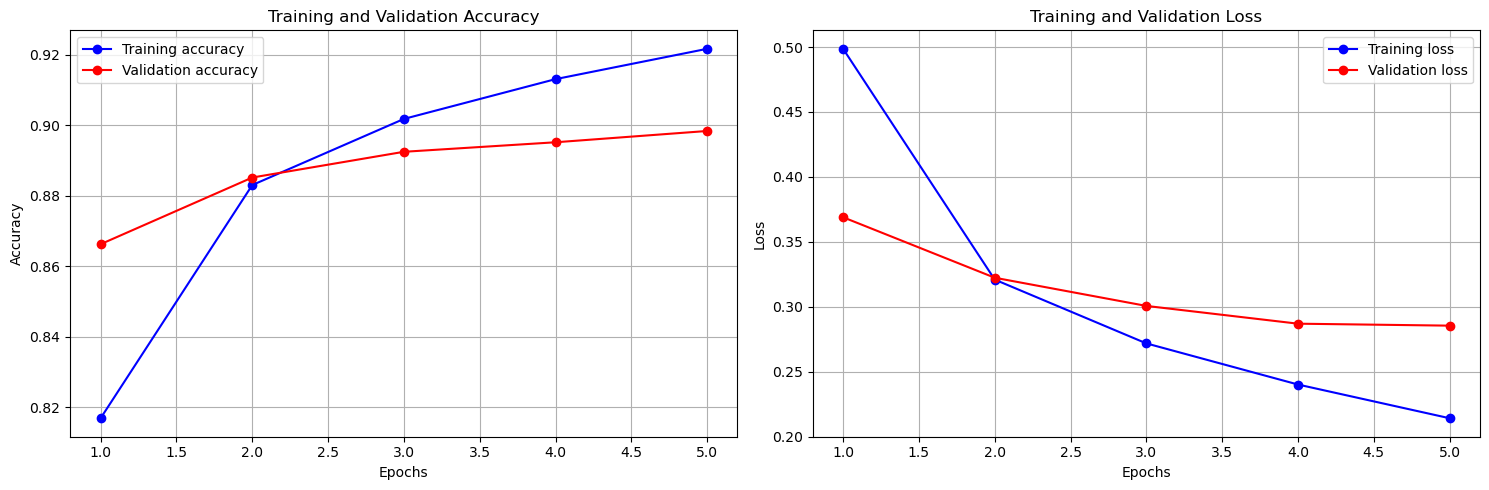

In [38]:

import matplotlib.pyplot as plt

history_dict = history.history


acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']


epochs = range(1, len(acc) + 1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))


ax1.plot(epochs, acc, 'bo-', label='Training accuracy')
ax1.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
ax1.set_title('Training and Validation Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)


ax2.plot(epochs, loss, 'bo-', label='Training loss')
ax2.plot(epochs, val_loss, 'ro-', label='Validation loss')
ax2.set_title('Training and Validation Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [39]:
model.save('trained_sahion_mnist_model.h5')